#### **Install libraries**

In [1]:
%pip install pandas folium matplotlib seaborn scikit-learn

#### **Importing libraries**

In [1]:
import pandas as pd

from sklearn.cluster import KMeans
import folium

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### **Read the csv data using pandas**

In [3]:
df = pd.read_csv("/content/data.csv")
df.head()

Date/Time      Lat      Lon    Base     Date
0  2014-07-01 0:03  40.7586 -73.9706  B02512  Tuesday
1  2014-07-01 0:05  40.7605 -73.9994  B02512  Tuesday
2  2014-07-01 0:06  40.7320 -73.9999  B02512  Tuesday
3  2014-07-01 0:09  40.7635 -73.9793  B02512  Tuesday
4  2014-07-01 0:20  40.7204 -74.0047  B02512  Tuesday

In [4]:
df.describe()

Lat            Lon
count  796121.000000  796121.000000
mean       40.739141     -73.972353
std         0.040551       0.058660
min        39.721400     -74.826000
25%        40.720900     -73.996100
50%        40.742500     -73.983200
75%        40.760800     -73.965100
max        41.341300     -72.309700

#### **Select useful columns**

In [5]:
x = df[["Lat", "Lon"]]
x.head()

Lat      Lon
0  40.7586 -73.9706
1  40.7605 -73.9994
2  40.7320 -73.9999
3  40.7635 -73.9793
4  40.7204 -74.0047

In [6]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
df['y'] = y_kmeans

In [8]:
df.head()

Date/Time      Lat      Lon    Base     Date  y
0  2014-07-01 0:03  40.7586 -73.9706  B02512  Tuesday  2
1  2014-07-01 0:05  40.7605 -73.9994  B02512  Tuesday  2
2  2014-07-01 0:06  40.7320 -73.9999  B02512  Tuesday  0
3  2014-07-01 0:09  40.7635 -73.9793  B02512  Tuesday  2
4  2014-07-01 0:20  40.7204 -74.0047  B02512  Tuesday  0

#### **Plotting the clusters**

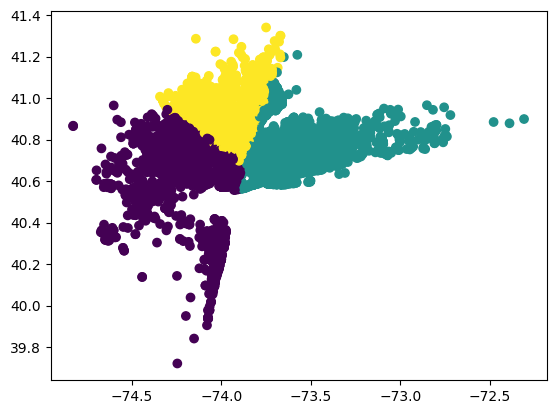

In [9]:
plt.scatter(df['Lon'], df['Lat'], c=df['y'])

#### **Constructing elbow's function to find cluster (k)**

In [10]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

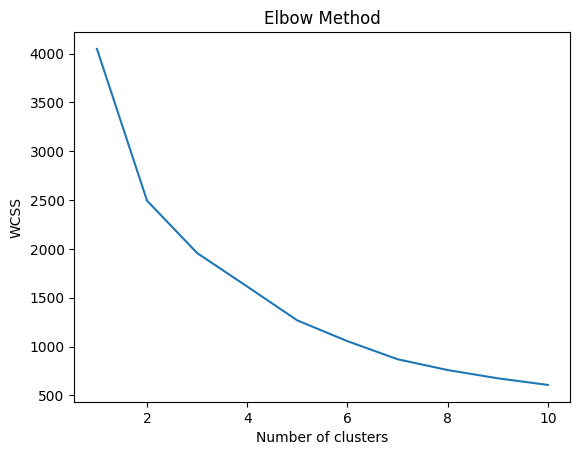

In [11]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

#### **Slice the data and use first 2000 points**

In [12]:
df = df[:2000]

cluster1 = df[['Lat', "Lon"]][df['y'] == 0].values.tolist()
cluster2 = df[['Lat', "Lon"]][df['y'] == 1].values.tolist()
cluster3 = df[['Lat', "Lon"]][df['y'] == 2].values.tolist()

In [13]:
map = folium.Map(location=[40.7128, -74.0060], zoom_start=10,tiles = "openstreetmap")
map

#### **Visualize the clusters**

In [17]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='blue').add_to(map)

for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='red').add_to(map)

for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='green').add_to(map)



In [18]:
map

## Congratulations on reaching this far. You are awesome☺️